In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
#Read the CSV file and prepare the DF
credit_data = pd.read_csv("german_credit.csv") 
print(credit_data.shape)

(1000, 21)


In [3]:
print(credit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

Many fields wiht object found. Need to analyse and correct it appropriately

In [4]:
credit_data.head()

default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc  \
0       .. >= 7 years                           4   
1  1 <= ... < 4 years                           2   
2  4 <= ... < 7 years                           2   
3  4 <= ... < 7 years                           2   
4  1 <= ... < 4 years                           3   

                   personal_status_sex  ... present_res_since  \
0                        male : single  ...                 4   
1  female : divorced/separated/married  ...                 2   
2                        male : single  ...                 3   
3                        male : single  ...                 4   
4                        male : single  ...                 4   

                                            property age  \
0                                        real estate  67   
1                                        real estate  22   
2                                        real estate  49   
3  if not A121 : building society savings agreeme...  45   
4                              unknown / no property  53   

   other_installment_plans   housing credits_this_bank  \
0                     none       own                 2   
1                     none       own                 1   
2                     none       own                 1   
3                     none  for free                 1   
4                     none  for free                 2   

                           job people_under_maintenance  \
0  skilled employee / official                        1   
1  skilled employee / official                        1   
2         unskilled - resident                        2   
3  skilled employee / official                        2   
4  skilled employee / official                        2   

                                   telephone foreign_worker  
0  yes, registered under the customers name             yes  
1                                       none            yes  
2                                       none            yes  
3                                       none            yes  
4                                       none            yes  

[5 rows x 21 columns]

In [5]:
#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for cls in credit_data.items():
    print(cls[0], "-", cls[1].nunique(), "values")
    if(cls[1].nunique() <= 10):
        print("    ", cls[1].unique())
#Seperate the column personal_status_sex into 2 [gender and personal_status]
        
#Columns to be encoded later        
#'account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 
#'other_debtors', 'property', 'other_installment_plans', 'housing', 'job','telephone', 'foreign_worker'


Number of unique values of other attributes
default - 2 values
     [0 1]
account_check_status - 4 values
     ['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']
duration_in_month - 33 values
credit_history - 5 values
     ['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']
purpose - 10 values
     ['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']
credit_amount - 921 values
savings - 5 values
     ['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']
present_emp_since - 5 values
     ['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']
instal

Feature analysis

default - 0 - defaulted 1 - not defaulted

account_check_status - 1. < 0 DM 2. >= 200 DM / salary assignments for at least 1 year 3. 0 <= ... < 200 DM 4. no checking account

duration_in_month - credit duration in months 

credit_history - 1.  credits at this bank paid back duly 2. critical account/ other credits existing (not at this bank)3. delay in paying off in the past 4. existing credits paid back duly till now 5. no credits taken/ all credits paid back duly

purpose - 1. (vacation - does not exist?) 2. business 3. car (new) 4. car (used) 5. domestic appliances 6. education 7. furniture/equipment 8. radio/television 9. repairs 10. retraining

credit_amount - credit amount taken

savings - 1. .. >= 1000 DM 2. ... < 100 DM 3. 100 <= ... < 500 DM 4. 500 <= ... < 1000 DM  5. unknown/ no savings account

present_emp_since - how long in the present company - .. >= 7 years 2. < ... < 1 year 3. 1 <= ... < 4 years 4. 4 <= ... < 7 years 5. unemployed

installment_as_income_perc - installment vs. income % 1 to 4

personal_status_sex - 1. (female : divorced/separated/married) 2. (male : divorced/separated) 3. (male : married/widowed) 4. (male : single)

other_debtors - 1. co-applicant 2. guarantor 3. none

present_res_since - 1 to 4

property - 1. (if not A121 : building society savings agreement/ life insurance) 2. (if not A121/A122 : car or other, not in attribute 6) 3. (real estate) 4. (unknown / no property)

age - 19 to 75

other_installment_plans - 1. bank 2. none 3. stores

housing - 1. for free 2. own 3.rent

credits_this_bank - 1 to 4 - not able to make any meaning of this feature

job - 1. (management/ self-employed/ highly qualified employee/ officer) 2. (skilled employee / official) 3. (unemployed/ unskilled - non-resident) 4. (unskilled - resident)

people_under_maintenance - 1 or 2 - not able to make any meaning out of this feature

telephone - Yes / No

foreign_worker - Yes / No


In [6]:
#Find the missing value.
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
print("NA values\n", credit_data.isna().sum())
print("Null values\n", credit_data.isnull().sum())

NA values
 default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64
Null values
 default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
per

In [7]:
#Just keep the original credit data in the copy if required later
credit_data_ref = credit_data.copy(deep=True)

In [8]:
credit_data[["gender", "personal_status"]] = credit_data["personal_status_sex"].str.split(":", n = 2, expand = True).rename(columns=dict(zip([0, 1], ['gender', 'personal_status'])))
credit_data.drop("personal_status_sex", axis=1, inplace=True)
credit_data.head()

default account_check_status  duration_in_month  \
0        0               < 0 DM                  6   
1        1    0 <= ... < 200 DM                 48   
2        0  no checking account                 12   
3        0               < 0 DM                 42   
4        1               < 0 DM                 24   

                                      credit_history  \
0  critical account/ other credits existing (not ...   
1           existing credits paid back duly till now   
2  critical account/ other credits existing (not ...   
3           existing credits paid back duly till now   
4                    delay in paying off in the past   

                        purpose  credit_amount                      savings  \
0           domestic appliances           1169  unknown/ no savings account   
1           domestic appliances           5951                 ... < 100 DM   
2  (vacation - does not exist?)           2096                 ... < 100 DM   
3              radio/television           7882                 ... < 100 DM   
4                     car (new)           4870                 ... < 100 DM   

    present_emp_since  installment_as_income_perc other_debtors  ...  age  \
0       .. >= 7 years                           4          none  ...   67   
1  1 <= ... < 4 years                           2          none  ...   22   
2  4 <= ... < 7 years                           2          none  ...   49   
3  4 <= ... < 7 years                           2     guarantor  ...   45   
4  1 <= ... < 4 years                           3          none  ...   53   

  other_installment_plans   housing credits_this_bank  \
0                    none       own                 2   
1                    none       own                 1   
2                    none       own                 1   
3                    none  for free                 1   
4                    none  for free                 2   

                           job  people_under_maintenance  \
0  skilled employee / official                         1   
1  skilled employee / official                         1   
2         unskilled - resident                         2   
3  skilled employee / official                         2   
4  skilled employee / official                         2   

                                   telephone  foreign_worker   gender  \
0  yes, registered under the customers name              yes    male    
1                                       none             yes  female    
2                                       none             yes    male    
3                                       none             yes    male    
4                                       none             yes    male    

               personal_status  
0                       single  
1   divorced/separated/married  
2                       single  
3                       single  
4                       single  

[5 rows x 22 columns]

In [9]:
#Encode the dataframe
from sklearn.preprocessing import LabelEncoder
columns = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'gender', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job','telephone', 'foreign_worker']
for col in columns:
    encoder = LabelEncoder()
    credit_data[col] = encoder.fit_transform(credit_data[col])

credit_data.head()           

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               1        4   
1        1                     0                 48               3        4   
2        0                     3                 12               1        0   
3        0                     1                 42               3        7   
4        1                     1                 24               2        2   

   credit_amount  savings  present_emp_since  installment_as_income_perc  \
0           1169        4                  0                           4   
1           5951        1                  2                           2   
2           2096        1                  3                           2   
3           7882        1                  3                           2   
4           4870        1                  2                           3   

   other_debtors  ...  age  other_installment_plans  housing  \
0              2  ...   67                        1        1   
1              2  ...   22                        1        1   
2              2  ...   49                        1        1   
3              1  ...   45                        1        0   
4              2  ...   53                        1        0   

   credits_this_bank  job  people_under_maintenance  telephone  \
0                  2    1                         1          1   
1                  1    1                         1          0   
2                  1    3                         2          0   
3                  1    1                         2          0   
4                  2    1                         2          0   

   foreign_worker  gender  personal_status  
0               1       1                3  
1               1       0                1  
2               1       1                3  
3               1       1                3  
4               1       1                3  

[5 rows x 22 columns]

In [10]:
#check if all are manageable datatypes
credit_data.dtypes

default                       int64
account_check_status          int32
duration_in_month             int64
credit_history                int32
purpose                       int32
credit_amount                 int64
savings                       int32
present_emp_since             int32
installment_as_income_perc    int64
other_debtors                 int32
present_res_since             int64
property                      int32
age                           int64
other_installment_plans       int32
housing                       int32
credits_this_bank             int64
job                           int32
people_under_maintenance      int64
telephone                     int32
foreign_worker                int32
gender                        int32
personal_status               int32
dtype: object

In [11]:
columnsEncoded = ['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'gender', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job','telephone', 'foreign_worker']
credit_data.describe().drop(columnsEncoded, axis=1).transpose()

count      mean          std    min     25%  \
default                     1000.0     0.300     0.458487    0.0     0.0   
duration_in_month           1000.0    20.903    12.058814    4.0    12.0   
credit_amount               1000.0  3271.258  2822.736876  250.0  1365.5   
installment_as_income_perc  1000.0     2.973     1.118715    1.0     2.0   
present_res_since           1000.0     2.845     1.103718    1.0     2.0   
age                         1000.0    35.546    11.375469   19.0    27.0   
credits_this_bank           1000.0     1.407     0.577654    1.0     1.0   
people_under_maintenance    1000.0     1.155     0.362086    1.0     1.0   

                               50%      75%      max  
default                        0.0     1.00      1.0  
duration_in_month             18.0    24.00     72.0  
credit_amount               2319.5  3972.25  18424.0  
installment_as_income_perc     3.0     4.00      4.0  
present_res_since              3.0     4.00      4.0  
age                           33.0    42.00     75.0  
credits_this_bank              1.0     2.00      4.0  
people_under_maintenance       1.0     1.00      2.0

In [12]:
corr = credit_data.corr()
corr.abs()
#'present_emp_since', 'present_res_since', 'people_under_maintenance' have very low correlation

default  account_check_status  duration_in_month  \
default                     1.000000              0.302406           0.214927   
account_check_status        0.302406              1.000000           0.096005   
duration_in_month           0.214927              0.096005           1.000000   
credit_history              0.097054              0.110683           0.029430   
purpose                     0.058483              0.007687           0.093921   
credit_amount               0.154739              0.092638           0.624984   
savings                     0.129332              0.134248           0.072265   
present_emp_since           0.001805              0.052057           0.028078   
installment_as_income_perc  0.072404              0.029780           0.074749   
other_debtors               0.028441              0.084286           0.006711   
present_res_since           0.002967              0.008835           0.034067   
property                    0.034011              0.032983           0.068363   
age                         0.091127              0.083636           0.036136   
other_installment_plans     0.053862              0.052184           0.003559   
housing                     0.019315              0.012511           0.157049   
credits_this_bank           0.045732              0.084513           0.011284   
job                         0.032756              0.029085           0.215438   
people_under_maintenance    0.003015              0.030417           0.023834   
telephone                   0.036466              0.037208           0.164718   
foreign_worker              0.082079              0.014658           0.138196   
gender                      0.075493              0.024889           0.081432   
personal_status             0.095055              0.062406           0.093721   

                            credit_history   purpose  credit_amount   savings  \
default                           0.097054  0.058483       0.154739  0.129332   
account_check_status              0.110683  0.007687       0.092638  0.134248   
duration_in_month                 0.029430  0.093921       0.624984  0.072265   
credit_history                    1.000000  0.057882       0.029050  0.001626   
purpose                           0.057882  1.000000       0.088610  0.041116   
credit_amount                     0.029050  0.088610       1.000000  0.087976   
savings                           0.001626  0.041116       0.087976  1.000000   
present_emp_since                 0.018060  0.016664       0.074224  0.043382   
installment_as_income_perc        0.059779  0.003199       0.271316  0.001663   
other_debtors                     0.011296  0.084020       0.037921  0.059876   
present_res_since                 0.086987  0.017550       0.028926  0.093577   
property                          0.051107  0.125088       0.081618  0.035966   
age                               0.157261  0.128689       0.032716  0.061369   
other_installment_plans           0.040499  0.038427       0.020224  0.018960   
housing                           0.084026  0.099185       0.135632  0.021146   
credits_this_bank                 0.387820  0.089907       0.020795  0.047965   
job                               0.013921  0.001895       0.261139  0.032630   
people_under_maintenance          0.070008  0.113761       0.017142  0.028827   
telephone                         0.039237  0.074844       0.276995  0.079551   
foreign_worker                    0.000513  0.029228       0.050050  0.012946   
gender                            0.059183  0.084723       0.093482  0.060212   
personal_status                   0.083229  0.097719       0.102481  0.083045   

                            present_emp_since  installment_as_income_perc  \
default                              0.001805                    0.072404   
account_check_status                 0.052057                    0.029780   
duration_in_month                    0.028078                    0.074

In [13]:
def printPairKdeAndBoxPlot(df, cols, hueVal):
    for col in cols:
        if(col != hueVal):   
            f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
            histData = [df[col][df[hueVal]==cls_name] for cls_name in [0, 1]]
            ax1.hist(histData, histtype='bar', normed=True, stacked=True)
            target_0 = df[df[hueVal]==0]
            target_1 = df[df[hueVal]==1]
            sns.distplot(target_0[col], hist=False, rug=True, ax=ax1, color='blue')
            sns.distplot(target_1[col], hist=False, rug=True, ax=ax1, color='orange')
            #df[col].plot(kind='kde', ax=ax1, secondary_y=True)
            ax2.scatter(df[hueVal], credit_data[col], c=df[hueVal])
            sns.boxplot(x=hueVal, y=col, data=df, ax=ax3)
            plt.title(col)
            plt.show() 

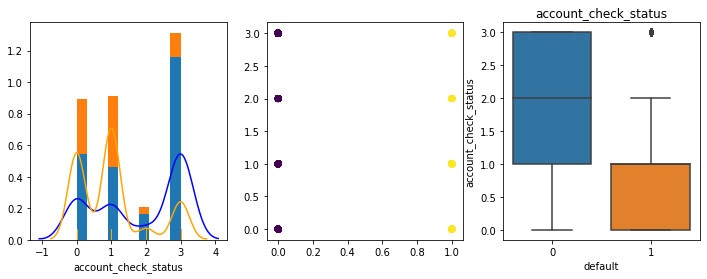

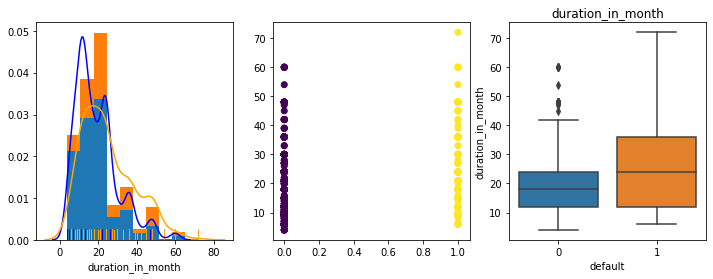

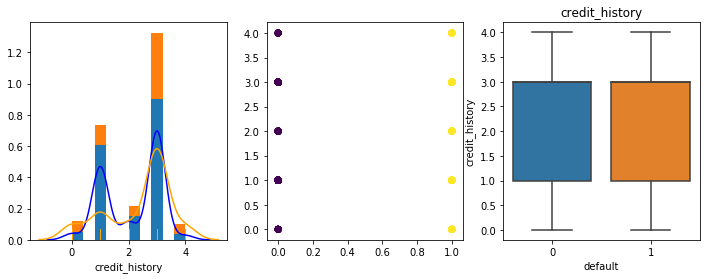

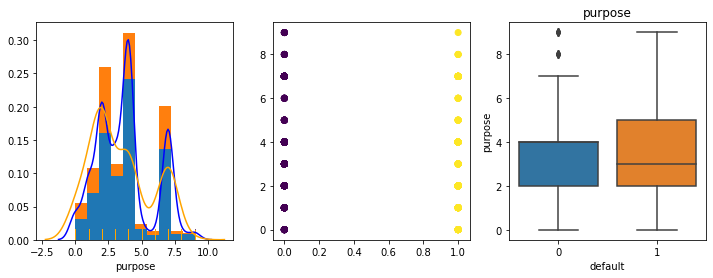

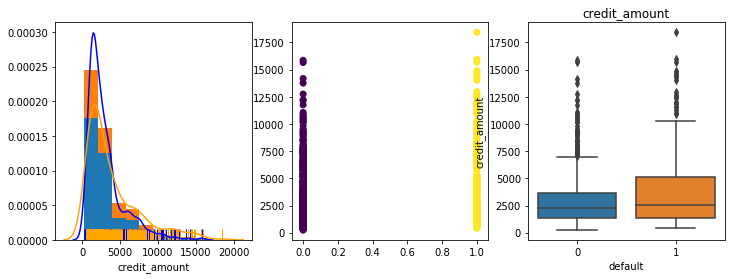

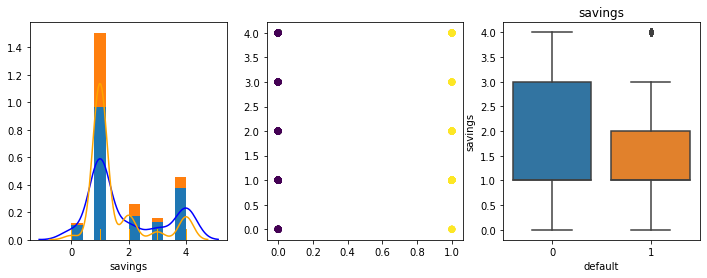

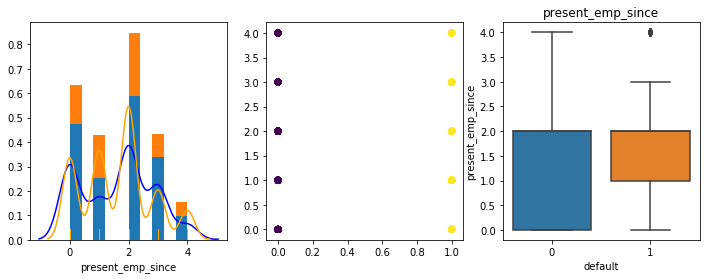

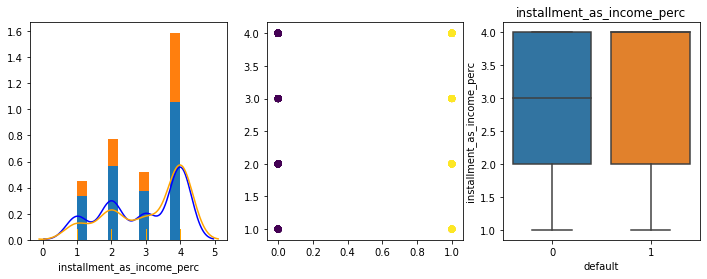

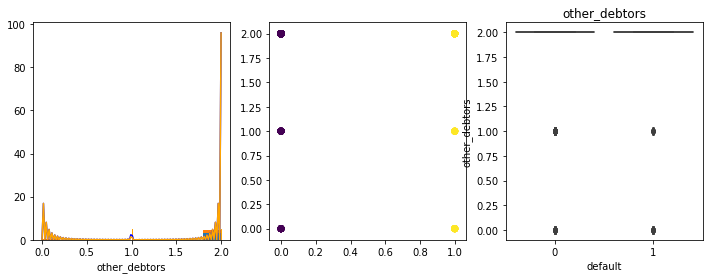

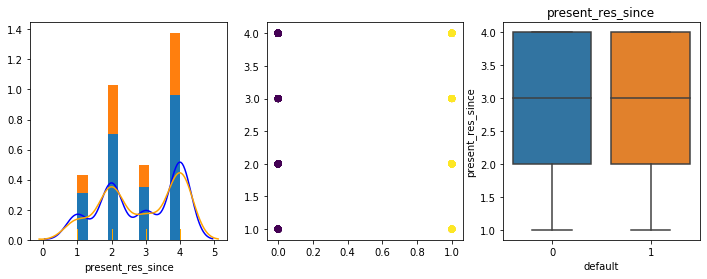

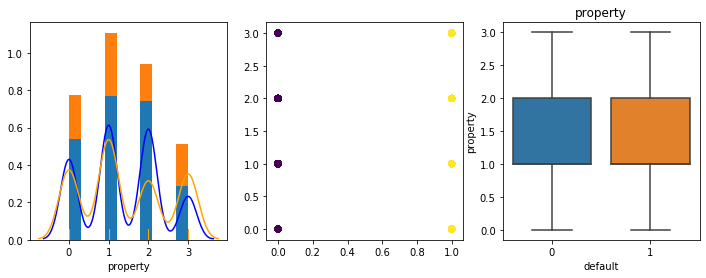

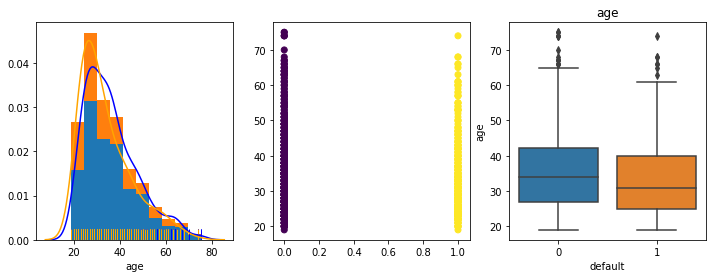

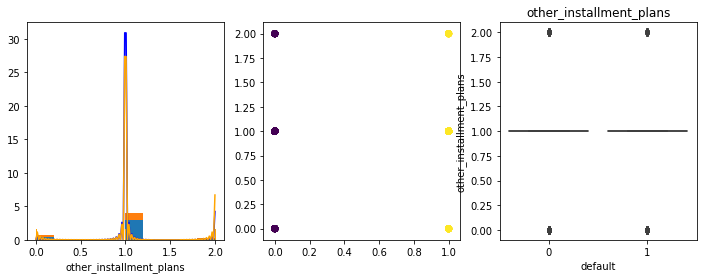

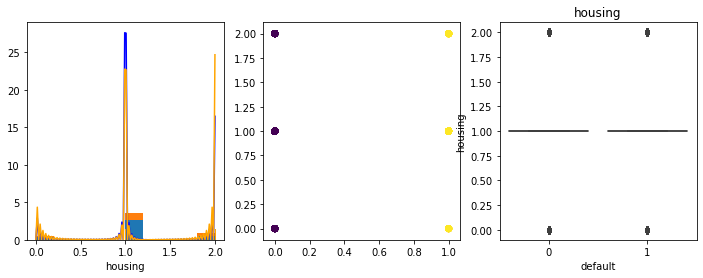

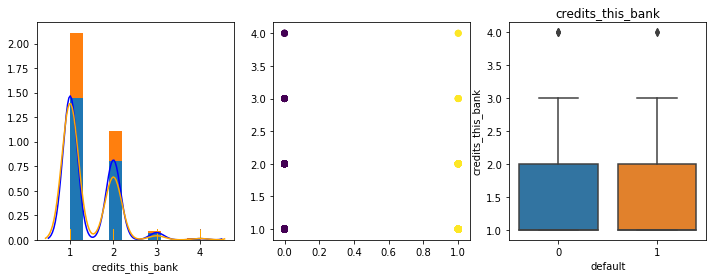

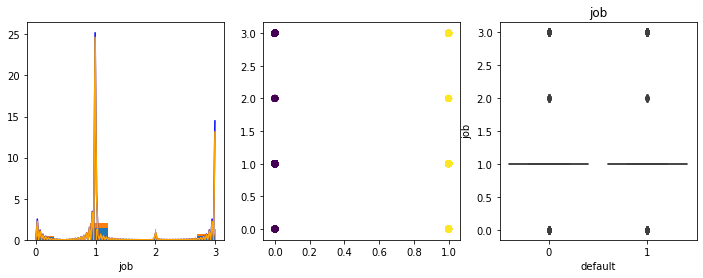

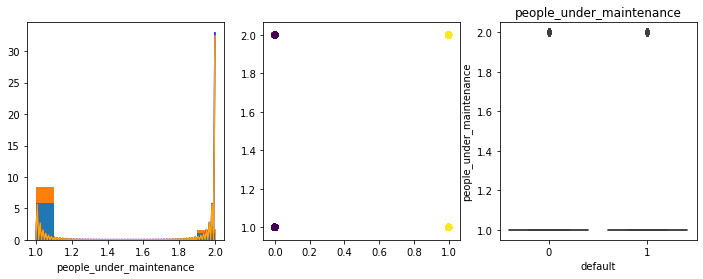

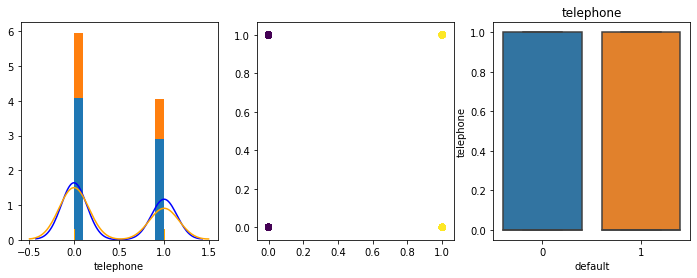

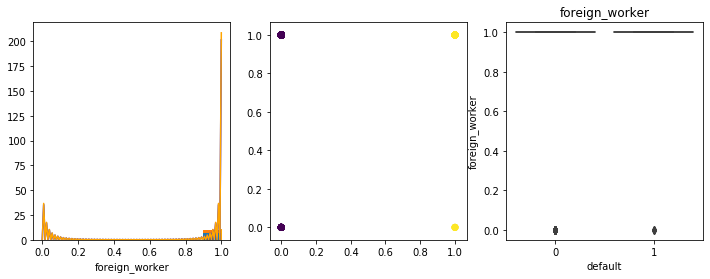

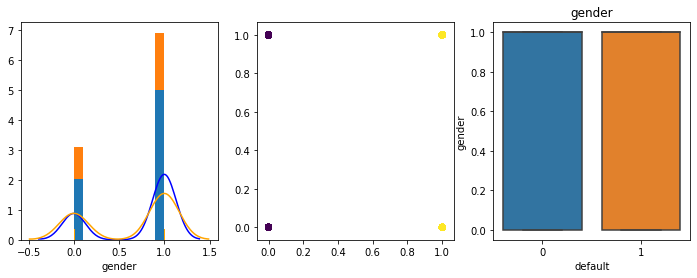

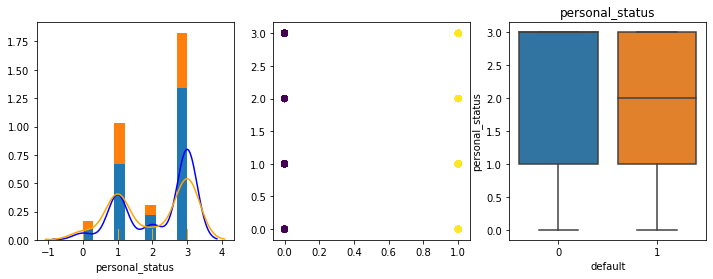

In [14]:
#checking the relationship with target and each column and how the box plot is for the same to see cluster possibility
for col in credit_data.columns:
    if(col != 'default'):
        printPairKdeAndBoxPlot(credit_data, ['default', col], "default")

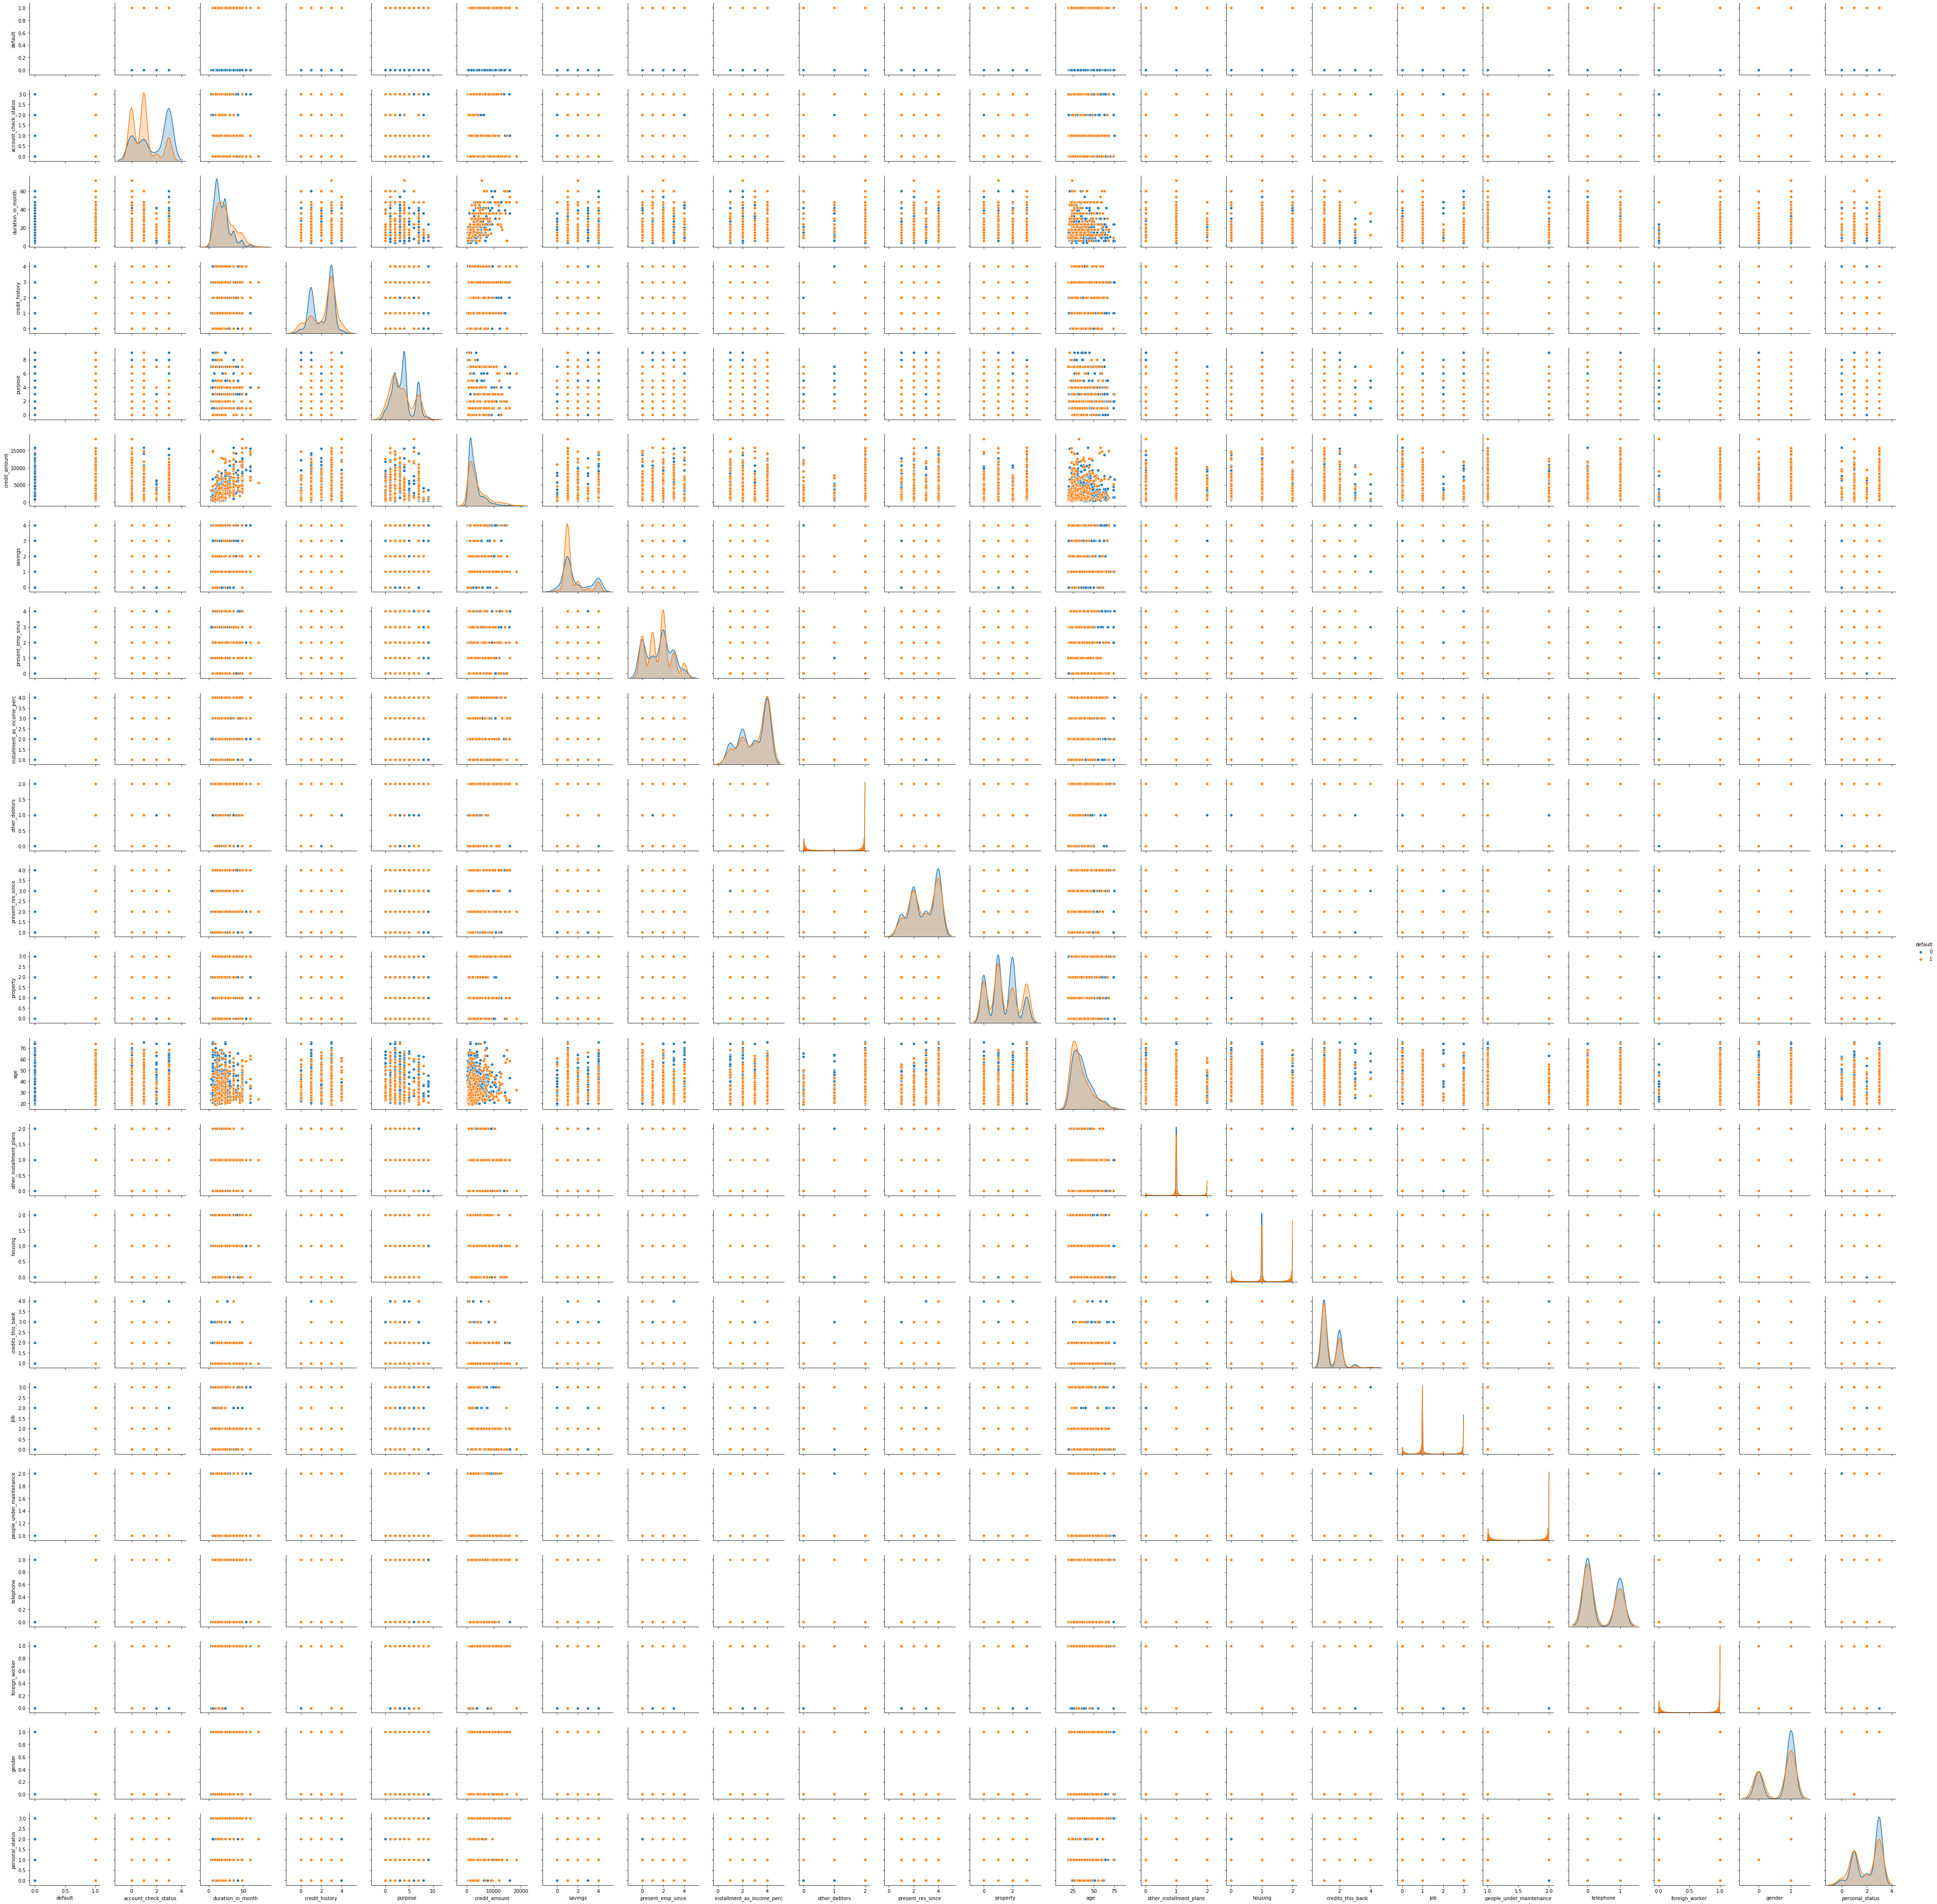

In [15]:
#Visualize with respect to target the various features
sns.pairplot(credit_data, hue="default", diag_kind='kde')
plt.show()

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [16]:
y = credit_data_ref["default"]
X = credit_data_ref.drop("default", axis=1)

In [17]:
#Split the data into training and test set in the ratio 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50,random_state=5)

In [18]:
# Lets build a Ensemble model but need to modify the dataset first

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [19]:
X_train = pd.get_dummies(X_train)
X_train.head()

duration_in_month  credit_amount  installment_as_income_perc  \
34                  12           1474                           4   
552                 48           6999                           1   
170                 15            950                           4   
466                 24           1659                           4   
713                  9           1138                           4   

     present_res_since  age  credits_this_bank  people_under_maintenance  \
34                   1   33                  1                         1   
552                  1   34                  2                         1   
170                  3   33                  2                         2   
466                  2   29                  1                         1   
713                  4   25                  2                         1   

     account_check_status_0 <= ... < 200 DM  account_check_status_< 0 DM  \
34                                        0                            0   
552                                       0                            1   
170                                       0                            1   
466                                       0                            1   
713                                       0                            1   

     account_check_status_>= 200 DM / salary assignments for at least 1 year  \
34                                                   1                         
552                                                  0                         
170                                                  0                         
466                                                  0                         
713                                                  0                         

     ...  housing_own  housing_rent  \
34   ...            1             0   
552  ...            1             0   
170  ...            0             1   
466  ...            0             1   
713  ...            1             0   

     job_management/ self-employed/ highly qualified employee/ officer  \
34                                                   1                   
552                                                  0                   
170                                                  0                   
466                                                  0                   
713                                                  0                   

     job_skilled employee / official  \
34                                 0   
552                                1   
170                                1   
466                                0   
713                                0   

     job_unemployed/ unskilled - non-resident  job_unskilled - resident  \
34                                          0                         0   
552                                         0                         0   
170                                         0                         0   
466                                         0                         1   
713                                         0                         1   

     telephone_none  telephone_yes, registered under the customers name   \
34                0                                                  1     
552               0                                                  1     
170               1                                                  0     
466               0                                                  1     
713               1                                                  0     

     foreign_worker_no  foreign_worker_yes  
34                   0                   1  
552                  0                   1  
170                  0                   1  
466                  0                   1  
713                  0                   1  

[5 rows x 61 columns]

In [20]:
# Print Shape of model data
X_train.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [21]:
corr = credit_data.corr()
corr.abs()

default  account_check_status  duration_in_month  \
default                     1.000000              0.302406           0.214927   
account_check_status        0.302406              1.000000           0.096005   
duration_in_month           0.214927              0.096005           1.000000   
credit_history              0.097054              0.110683           0.029430   
purpose                     0.058483              0.007687           0.093921   
credit_amount               0.154739              0.092638           0.624984   
savings                     0.129332              0.134248           0.072265   
present_emp_since           0.001805              0.052057           0.028078   
installment_as_income_perc  0.072404              0.029780           0.074749   
other_debtors               0.028441              0.084286           0.006711   
present_res_since           0.002967              0.008835           0.034067   
property                    0.034011              0.032983           0.068363   
age                         0.091127              0.083636           0.036136   
other_installment_plans     0.053862              0.052184           0.003559   
housing                     0.019315              0.012511           0.157049   
credits_this_bank           0.045732              0.084513           0.011284   
job                         0.032756              0.029085           0.215438   
people_under_maintenance    0.003015              0.030417           0.023834   
telephone                   0.036466              0.037208           0.164718   
foreign_worker              0.082079              0.014658           0.138196   
gender                      0.075493              0.024889           0.081432   
personal_status             0.095055              0.062406           0.093721   

                            credit_history   purpose  credit_amount   savings  \
default                           0.097054  0.058483       0.154739  0.129332   
account_check_status              0.110683  0.007687       0.092638  0.134248   
duration_in_month                 0.029430  0.093921       0.624984  0.072265   
credit_history                    1.000000  0.057882       0.029050  0.001626   
purpose                           0.057882  1.000000       0.088610  0.041116   
credit_amount                     0.029050  0.088610       1.000000  0.087976   
savings                           0.001626  0.041116       0.087976  1.000000   
present_emp_since                 0.018060  0.016664       0.074224  0.043382   
installment_as_income_perc        0.059779  0.003199       0.271316  0.001663   
other_debtors                     0.011296  0.084020       0.037921  0.059876   
present_res_since                 0.086987  0.017550       0.028926  0.093577   
property                          0.051107  0.125088       0.081618  0.035966   
age                               0.157261  0.128689       0.032716  0.061369   
other_installment_plans           0.040499  0.038427       0.020224  0.018960   
housing                           0.084026  0.099185       0.135632  0.021146   
credits_this_bank                 0.387820  0.089907       0.020795  0.047965   
job                               0.013921  0.001895       0.261139  0.032630   
people_under_maintenance          0.070008  0.113761       0.017142  0.028827   
telephone                         0.039237  0.074844       0.276995  0.079551   
foreign_worker                    0.000513  0.029228       0.050050  0.012946   
gender                            0.059183  0.084723       0.093482  0.060212   
personal_status                   0.083229  0.097719       0.102481  0.083045   

                            present_emp_since  installment_as_income_perc  \
default                              0.001805                    0.072404   
account_check_status                 0.052057                    0.029780   
duration_in_month                    0.028078                    0.074

In [22]:
from scipy.stats import zscore
credit_data_z = credit_data.apply(zscore)

In [23]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [24]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(credit_data_z, 'average')
c, coph_dists = cophenet(Z , pdist(credit_data_z))
c

0.6905271784755415

In [25]:
pd.DataFrame((zip(credit_data_z.columns, coph_dists)), columns=["Features", "CophDist"]).sort_values("CophDist", ascending=False)

Features  CophDist
21             personal_status  8.345754
2            duration_in_month  7.302436
16                         job  7.086233
3               credit_history  6.880554
4                      purpose  6.880554
17    people_under_maintenance  6.880554
0                      default  6.783902
6                      savings  6.783902
1         account_check_status  6.489404
18                   telephone  6.489404
20                      gender  6.489404
7            present_emp_since  6.287635
9                other_debtors  5.939491
10           present_res_since  5.939491
13     other_installment_plans  5.939491
14                     housing  5.939491
11                    property  5.939491
8   installment_as_income_perc  5.672257
12                         age  5.118715
19              foreign_worker  5.118715
15           credits_this_bank  4.877663
5                credit_amount  4.877663

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('High correlation  \'' + X.iloc[:, variables].columns[maxloc] +  '\'' + ' with vif ' + str(max(vif)))
            del variables[maxloc]
            dropped = True

In [27]:
#High colinearity is indicated by threshold of > 5
calculate_vif_(credit_data, 5)

High correlation  'foreign_worker' with vif 24.25712814766376
High correlation  'other_debtors' with vif 15.796610577842818
High correlation  'personal_status' with vif 13.180489903312631
High correlation  'age' with vif 12.263033161036898
High correlation  'people_under_maintenance' with vif 10.705727182187195
High correlation  'installment_as_income_perc' with vif 9.05037748387369
High correlation  'present_res_since' with vif 7.445359132526578
High correlation  'duration_in_month' with vif 6.532872376086087
High correlation  'credits_this_bank' with vif 6.254993332619768
High correlation  'other_installment_plans' with vif 5.143221015958092


### Drop the original variables which are converted to dummy

In [28]:
#X = pd.get_dummies(X)
X = pd.get_dummies(X, drop_first=True)
X.columns

Index(['duration_in_month', 'credit_amount', 'installment_as_income_perc',
       'present_res_since', 'age', 'credits_this_bank',
       'people_under_maintenance', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_business', 'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs', 'purpose_retraining', 'savings_... < 100 DM',
       'savings_100 <= ... < 500 DM', 'savings_500 <= ... < 1000 DM ',
       'savings_unknown/ no savings account',
       '

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70,random_state=5)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfcl = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion='entropy',random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [32]:
#False Positive: (Type 1 Error) Interpretation: You predicted positive and it’s false. 
#You predicted that the person will take loan but he actually will not.
#False Negative: (Type 2 Error) Interpretation: You predicted negative and it’s false.
#You predicted that the person will not take loan but he actually will.
#Create a function for printing confusion matrix and Accuracy
def printConfusionMatrixAndAccuracy(PrintText, ConfusionMatrix):
    print("Confusion matrix - ", PrintText)
    print(ConfusionMatrix)
    print("Analysis of confusion matrix")
    print("True positive: correctly predicted as will not default - ", ConfusionMatrix[0,0])
    print("True negative: correctly predicted as will default - ", ConfusionMatrix[1,1])
    print("False positive: wrongly predicted as will default - ", ConfusionMatrix[0,1])
    print("False negative: wrongly predicted as will not default - ", ConfusionMatrix[1,0])

In [33]:
print(rfcl.score(X_train , y_train))
print(rfcl.score(X_test , y_test))
y_pred = rfcl.predict(X_test)
confusion_matrix_dt = metrics.confusion_matrix(y_test, y_pred)
printConfusionMatrixAndAccuracy("Random Forest", confusion_matrix_dt)

1.0
0.7528571428571429
Confusion matrix -  Random Forest
[[445  56]
 [117  82]]
Analysis of confusion matrix
True positive: correctly predicted as will not default -  445
True negative: correctly predicted as will default -  82
False positive: wrongly predicted as will default -  56
False negative: wrongly predicted as will not default -  117


### Q6 Show the list of the features importance( 1 Marks)

In [34]:
pd.DataFrame((zip(X.columns, rfcl.feature_importances_)), columns=["Features", "Importance"]).sort_values("Importance", ascending=False)

Features  Importance
1                                       credit_amount    0.104437
4                                                 age    0.083289
0                                   duration_in_month    0.080050
9            account_check_status_no checking account    0.055929
2                          installment_as_income_perc    0.041024
7                         account_check_status_< 0 DM    0.039181
3                                   present_res_since    0.039036
5                                   credits_this_bank    0.025768
23                               savings_... < 100 DM    0.025246
37                               property_real estate    0.024406
39                       other_installment_plans_none    0.023203
10  credit_history_critical account/ other credits...    0.022318
36  property_if not A121/A122 : car or other, not ...    0.021007
46  telephone_yes, registered under the customers ...    0.020876
28               present_emp_since_1 <= ... < 4 years    0.020852
33                  personal_status_sex_male : single    0.019349
12  credit_history_existing credits paid back duly...    0.017957
43                    job_skilled employee / official    0.017920
15                                  purpose_car (new)    0.017655
41                                        housing_own    0.017638
20                           purpose_radio/television    0.016933
29               present_emp_since_4 <= ... < 7 years    0.016920
42                                       housing_rent    0.016320
27                    present_emp_since_... < 1 year     0.016259
17                        purpose_domestic appliances    0.016071
26                savings_unknown/ no savings account    0.015913
14                                   purpose_business    0.013815
31      personal_status_sex_male : divorced/separated    0.013655
45                           job_unskilled - resident    0.012622
11     credit_history_delay in paying off in the past    0.012353
16                                 purpose_car (used)    0.012209
38                     property_unknown / no property    0.012171
30                       present_emp_since_unemployed    0.011224
6                            people_under_maintenance    0.010791
32         personal_status_sex_male : married/widowed    0.010643
8   account_check_status_>= 200 DM / salary assign...    0.009486
40                     other_installment_plans_stores    0.009306
35                                 other_debtors_none    0.009278
24                        savings_100 <= ... < 500 DM    0.008395
13  credit_history_no credits taken/ all credits p...    0.008395
25                      savings_500 <= ... < 1000 DM     0.006703
18                                  purpose_education    0.006274
34                            other_debtors_guarantor    0.005102
47                                 foreign_worker_yes    0.004859
19                        purpose_furniture/equipment    0.003115
44           job_unemployed/ unskilled - non-resident    0.002666
21                                    purpose_repairs    0.001160
22                                 purpose_retraining    0.000223

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [36]:
# Use below values
num_folds = 10
seed = 77

In [37]:
#Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
#The general procedure is as follows:
#1. Shuffle the dataset randomly.
#2. Split the dataset into k groups
#3. For each unique group:
#4. Take the group as a hold out or test data set
#5. Take the remaining groups as a training data set
#6. Fit a model on the training set and evaluate it on the test set
#7. Retain the evaluation score and discard the model
#8. Summarize the skill of the model using the sample of model evaluation scores

In [38]:
#Validate the Random Forest model build above using k fold

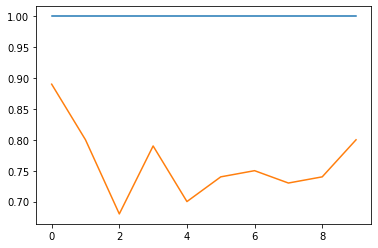

In [39]:
#create the KFold with specified num_folds and seed
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
rfcl = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion='entropy',random_state=9999)
results = pd.DataFrame(columns=['training_score', 'test_score'])
for train, test in kfold.split(credit_data_z):
    rfcl.fit(X.iloc[train], y.iloc[train])
    results.loc[len(results)] = [rfcl.score(X.iloc[train], y.iloc[train]), rfcl.score(X.iloc[test], y.iloc[test])]

plt.ylabel="Score"
plt.xlabel="num_folds"
plt.plot(results)
plt.show()

In [40]:
#Calculate Mean score
results.mean()

training_score    1.000
test_score        0.762
dtype: float64

In [41]:
# Calculate score standard deviation using std()
results.std()

training_score    0.000000
test_score        0.060332
dtype: float64

# Q8 Print the confusion matrix( 1 Marks)

In [42]:
printConfusionMatrixAndAccuracy("Random Forest", confusion_matrix_dt)

Confusion matrix -  Random Forest
[[445  56]
 [117  82]]
Analysis of confusion matrix
True positive: correctly predicted as will not default -  445
True negative: correctly predicted as will default -  82
False positive: wrongly predicted as will default -  56
False negative: wrongly predicted as will not default -  117


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [43]:
def recallScore(ConfusionMatrix):
    #TP/[TP+FN]
    return ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[1,0])

def precisionScore(ConfusionMatrix):
    #TP/[TP+FP]
    return ConfusionMatrix[0,0]/(ConfusionMatrix[0,0]+ConfusionMatrix[0,1])

def f1Score(ConfusionMatrix):
    #2*Recall*Precision/[Recall+Precision]
    return (2*recallScore(ConfusionMatrix)*precisionScore(ConfusionMatrix))/(recallScore(ConfusionMatrix)+precisionScore(ConfusionMatrix))

In [44]:
print("Recall = ", recallScore(confusion_matrix_dt), "\nPrecision = ", precisionScore(confusion_matrix_dt), "\nF1 score = ", f1Score(confusion_matrix_dt))

Recall =  0.791814946619217 
Precision =  0.8882235528942116 
F1 score =  0.8372530573847601


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [45]:
#Hint: Use roc_curve

In [46]:
#Just doing the train / test set again to be sure that above code does not impact the rest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70,random_state=5)


#create the model and get the model prepared for the training data set
rfcl = RandomForestClassifier(n_jobs=2, n_estimators=500, criterion='entropy',random_state=9999)
rfcl.fit(X_train, y_train)

#Target variable in this case is (0,1) and hence the classifier would output a probability matrix of dimension (N,2). 
#The first index refers to the probability that the data belong to class 0, 
#The second refers to the probability that the data belong to class 1.
#These two would sum to 1
y_probability = rfcl.predict_proba(X_test)[:,1]

#ROC Curves summarize the trade-off between the true positive rate and false positive rate 
#for a predictive model using different probability thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_probability, pos_label=1)

#Get the area under true positive rate and false positive rate curve
roc_auc = metrics.auc(fpr, tpr)

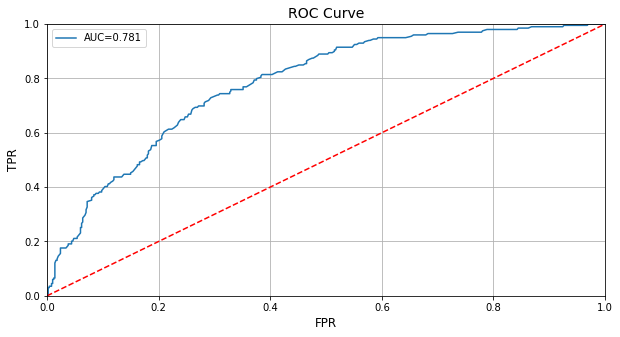

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1],'r--')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title("ROC Curve", fontsize=14)
ax.set_ylabel('TPR', fontsize=12)
ax.set_xlabel('FPR', fontsize=12)
ax.grid()
ax.legend(["AUC=%.3f"%roc_auc])
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [48]:
#done as part of Q10.

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [49]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [50]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [51]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7427142857142857
Standard deviation:  0.008653181554804483


# Useful code from Kaggle - plots the AUC for different KFolds

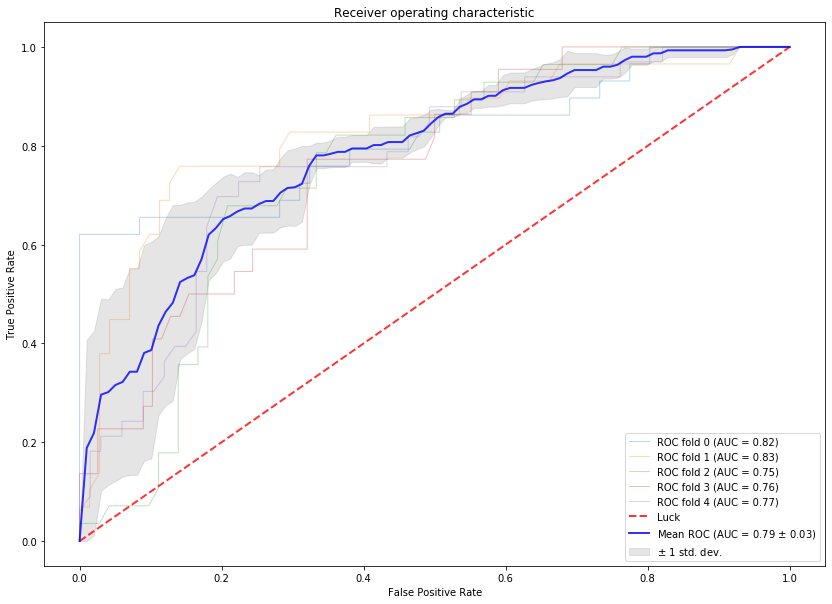

AUC Train  AUC Test
0        1.0  0.815202
1        1.0  0.831229
2        1.0  0.750248
3        1.0  0.760198
4        1.0  0.772727

In [52]:
#Random Forest & K-Fold Cross Validation - courtesy Kaggle :)
#Adapted for the KFold
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = rfcl.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score


#create a KFold using the spefied num_folds and seed
cv = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rfcl.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])